In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv(r"C:\Users\USER\Downloads\archive (3)\Global_AI_Content_Impact_Dataset.csv",header=0)
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [2]:
df.isnull().sum()

Country                                       0
Year                                          0
Industry                                      0
AI Adoption Rate (%)                          0
AI-Generated Content Volume (TBs per year)    0
Job Loss Due to AI (%)                        0
Revenue Increase Due to AI (%)                0
Human-AI Collaboration Rate (%)               0
Top AI Tools Used                             0
Regulation Status                             0
Consumer Trust in AI (%)                      0
Market Share of AI Companies (%)              0
dtype: int64

In [3]:
df.dtypes

Country                                        object
Year                                            int64
Industry                                       object
AI Adoption Rate (%)                          float64
AI-Generated Content Volume (TBs per year)    float64
Job Loss Due to AI (%)                        float64
Revenue Increase Due to AI (%)                float64
Human-AI Collaboration Rate (%)               float64
Top AI Tools Used                              object
Regulation Status                              object
Consumer Trust in AI (%)                      float64
Market Share of AI Companies (%)              float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     200 non-null    object 
 1   Year                                        200 non-null    int64  
 2   Industry                                    200 non-null    object 
 3   AI Adoption Rate (%)                        200 non-null    float64
 4   AI-Generated Content Volume (TBs per year)  200 non-null    float64
 5   Job Loss Due to AI (%)                      200 non-null    float64
 6   Revenue Increase Due to AI (%)              200 non-null    float64
 7   Human-AI Collaboration Rate (%)             200 non-null    float64
 8   Top AI Tools Used                           200 non-null    object 
 9   Regulation Status                           200 non-null    object 
 10  Consumer Trust

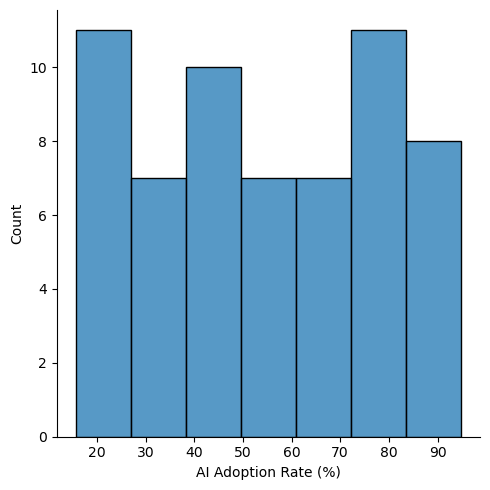

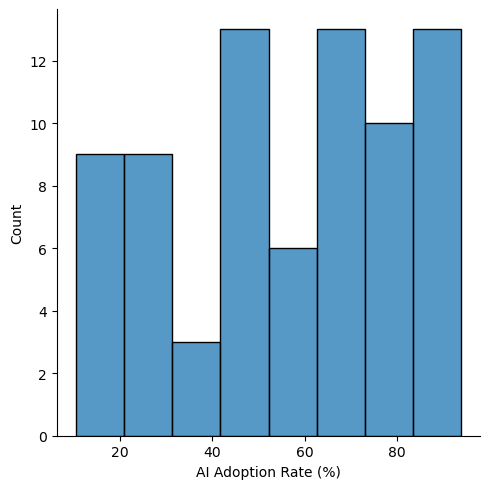

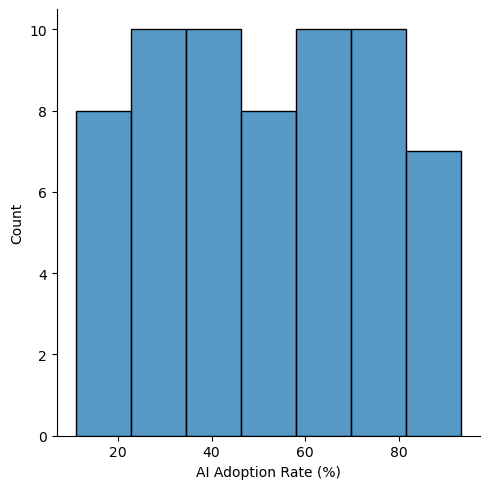

In [5]:
# displot 

import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Strict'])
sns.displot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Moderate'])
sns.displot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Lenient'])

plt.show()


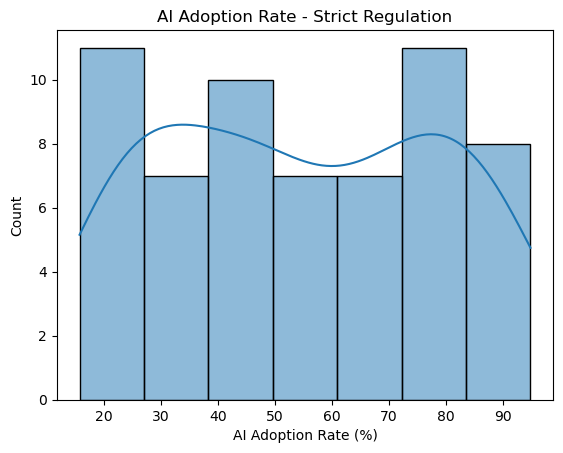

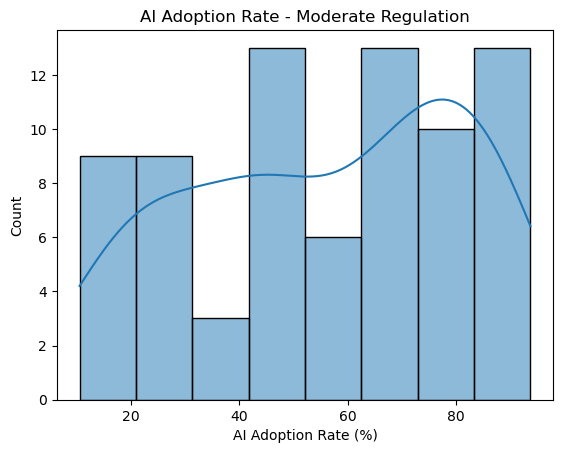

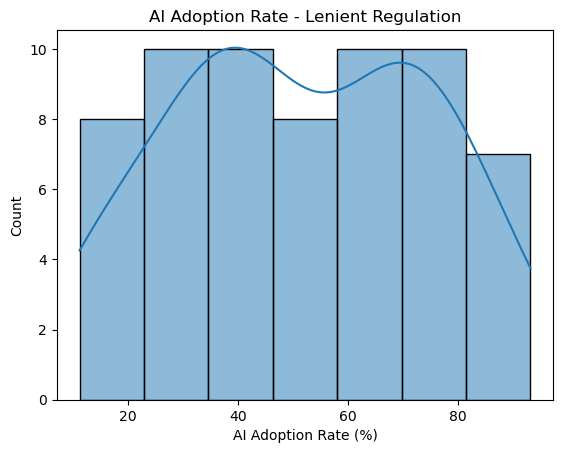

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# For 'Strict' category
sns.histplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Strict'], kde=True)
plt.title('AI Adoption Rate - Strict Regulation')
plt.show()

# For 'Moderate' category
sns.histplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Moderate'], kde=True)
plt.title('AI Adoption Rate - Moderate Regulation')
plt.show()

# For 'Lenient' category
sns.histplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Lenient'], kde=True)
plt.title('AI Adoption Rate - Lenient Regulation')
plt.show()


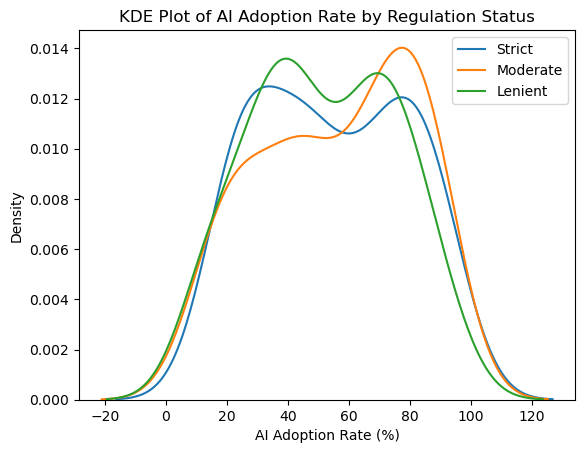

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for Strict
sns.kdeplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Strict'], label='Strict')

# KDE plot for Moderate
sns.kdeplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Moderate'], label='Moderate')

# KDE plot for Lenient
sns.kdeplot(df['AI Adoption Rate (%)'][df['Regulation Status'] == 'Lenient'], label='Lenient')

plt.xlabel('AI Adoption Rate (%)')
plt.title('KDE Plot of AI Adoption Rate by Regulation Status')
plt.legend()
plt.show()


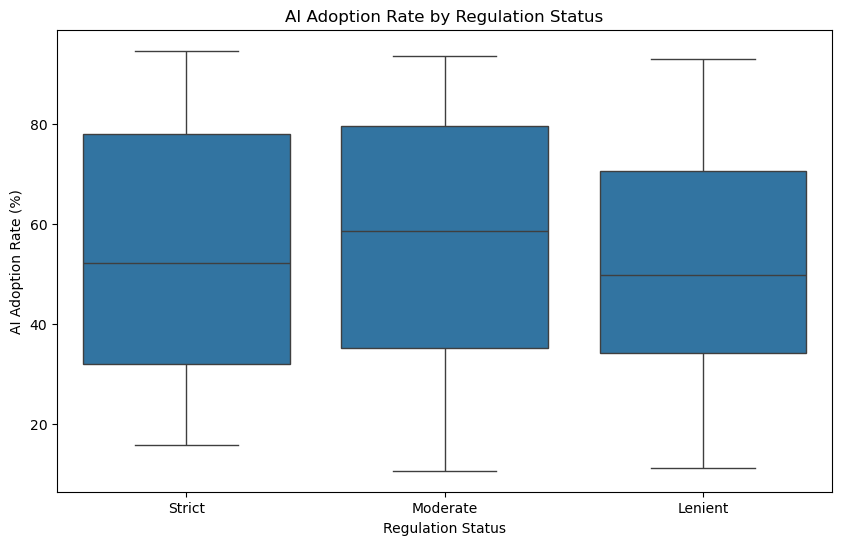

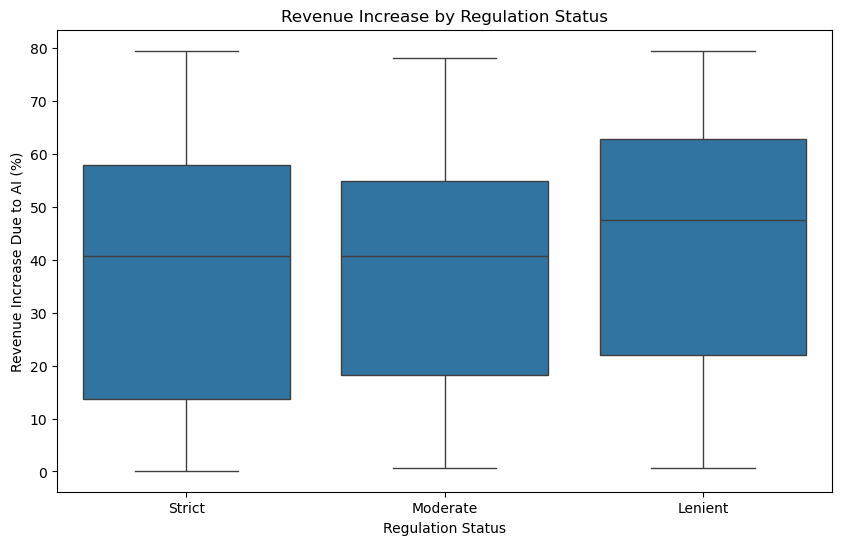

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Regulation Status', y='AI Adoption Rate (%)', data=df)
plt.title('AI Adoption Rate by Regulation Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Regulation Status', y='Revenue Increase Due to AI (%)', data=df)
plt.title('Revenue Increase by Regulation Status')
plt.show()


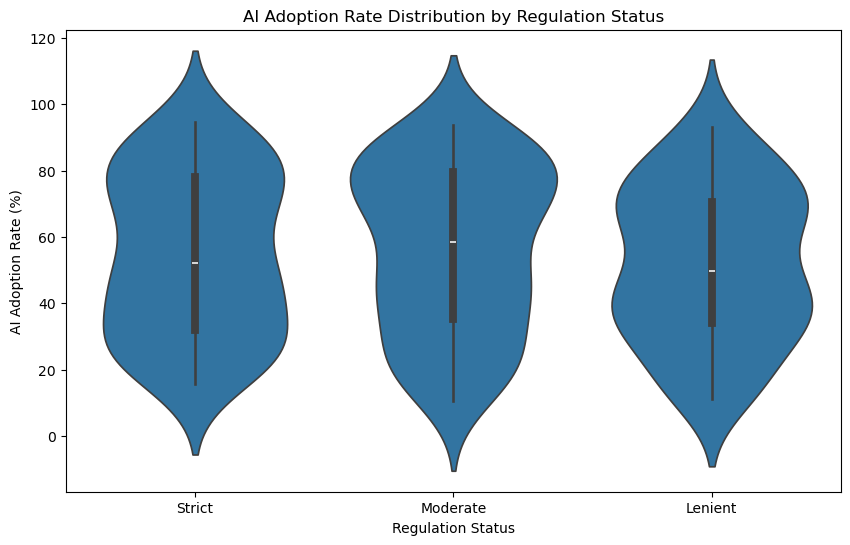

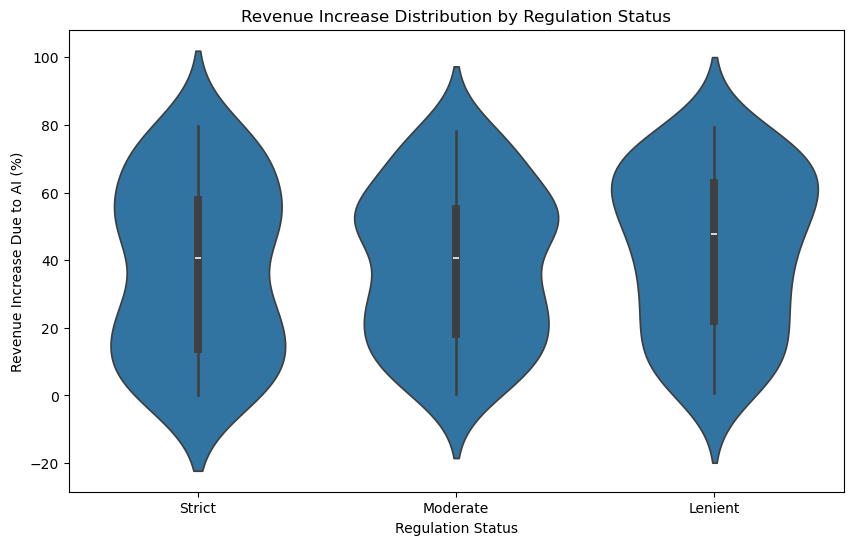

In [9]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Regulation Status', y='AI Adoption Rate (%)', data=df)
plt.title('AI Adoption Rate Distribution by Regulation Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='Regulation Status', y='Revenue Increase Due to AI (%)', data=df)
plt.title('Revenue Increase Distribution by Regulation Status')
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_3996\306845242.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Regulation Status', y='AI Adoption Rate (%)', data=df, ci='sd')


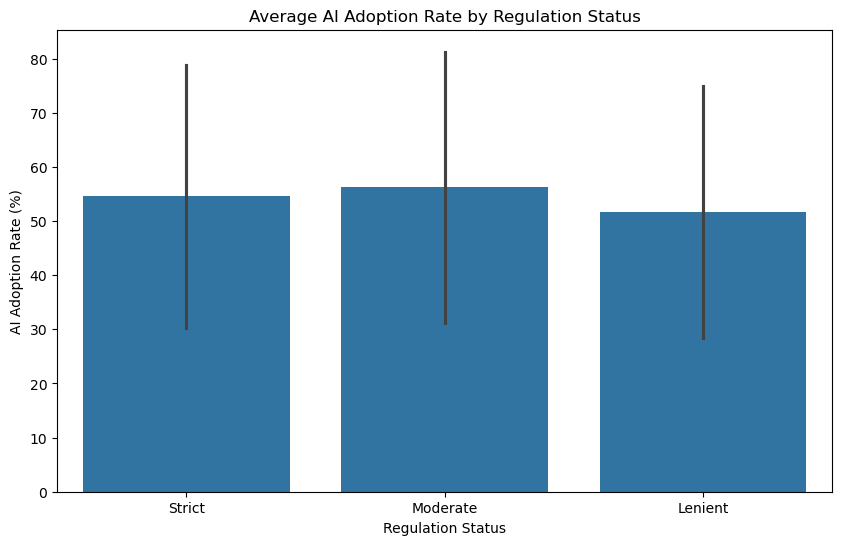

C:\Users\USER\AppData\Local\Temp\ipykernel_3996\306845242.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Regulation Status', y='Revenue Increase Due to AI (%)', data=df, ci='sd')


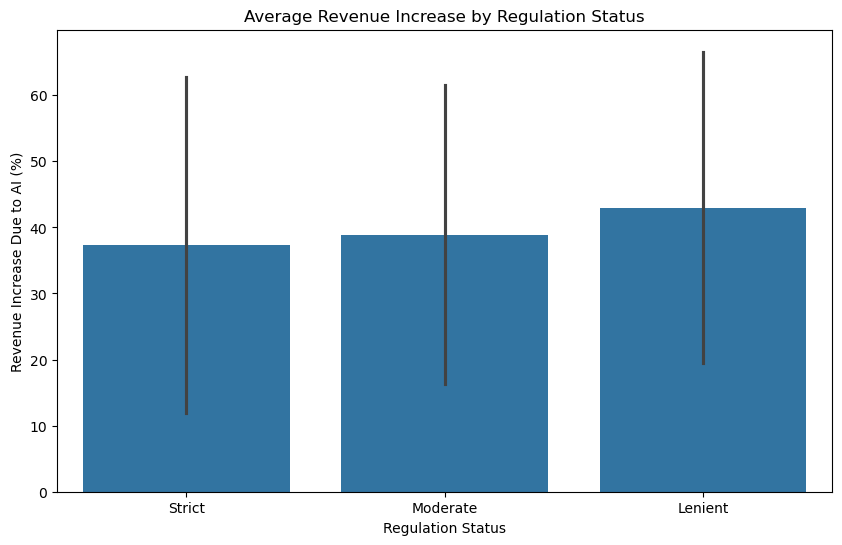

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Regulation Status', y='AI Adoption Rate (%)', data=df, ci='sd')
plt.title('Average AI Adoption Rate by Regulation Status')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Regulation Status', y='Revenue Increase Due to AI (%)', data=df, ci='sd')
plt.title('Average Revenue Increase by Regulation Status')
plt.show()


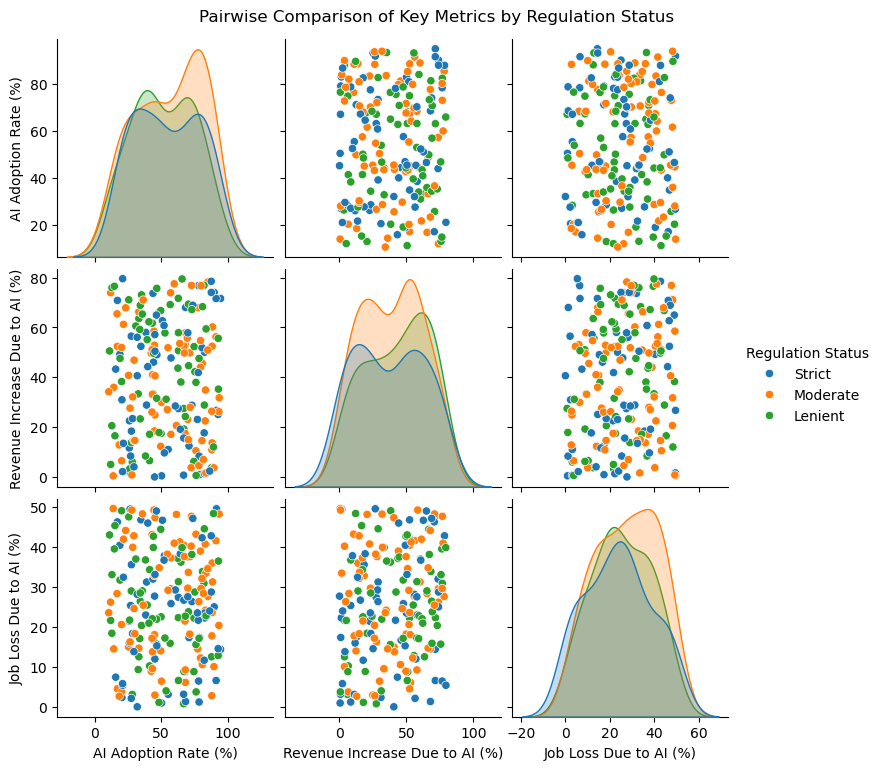

In [11]:
selected_cols = ['AI Adoption Rate (%)', 'Revenue Increase Due to AI (%)', 'Job Loss Due to AI (%)', 'Regulation Status']
sns.pairplot(df[selected_cols], hue='Regulation Status')
plt.suptitle('Pairwise Comparison of Key Metrics by Regulation Status', y=1.02)
plt.show()


In [22]:
df_original = df.copy()
le_reg = LabelEncoder()
df['Regulation Status Encoded'] = le_reg.fit_transform(df['Regulation Status'])

categorical_cols = ['Country', 'Industry', 'Top AI Tools Used']
encoders = {}  

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


In [23]:
df.drop('Regulation Status', axis=1, inplace=True)
df.rename(columns={'Regulation Status Encoded': 'Regulation Status'}, inplace=True)

In [24]:
X = df.drop('Regulation Status', axis=1)
y = df['Regulation Status']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:   ", recall_score(y_test, y_pred, average='macro'))
print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))


Accuracy:  0.375
Precision: 0.3819047619047619
Recall:    0.40734265734265734
F1 Score:  0.3444444444444444


In [29]:
label_mapping = dict(zip(le_reg.classes_, le_reg.transform(le_reg.classes_)))
print("Label Encoding Mapping:", label_mapping)


Label Encoding Mapping: {0: 0, 1: 1, 2: 2}


In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm2=confusion_matrix(y_pred,y_test)
cm2

array([[9, 8, 8],
       [1, 2, 4],
       [1, 3, 4]], dtype=int64)

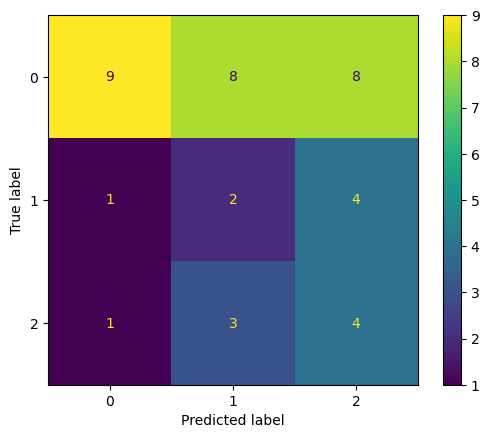

In [31]:
import matplotlib.pyplot as plt
cmd1=ConfusionMatrixDisplay(cm2)
cmd1.plot()
plt.show()